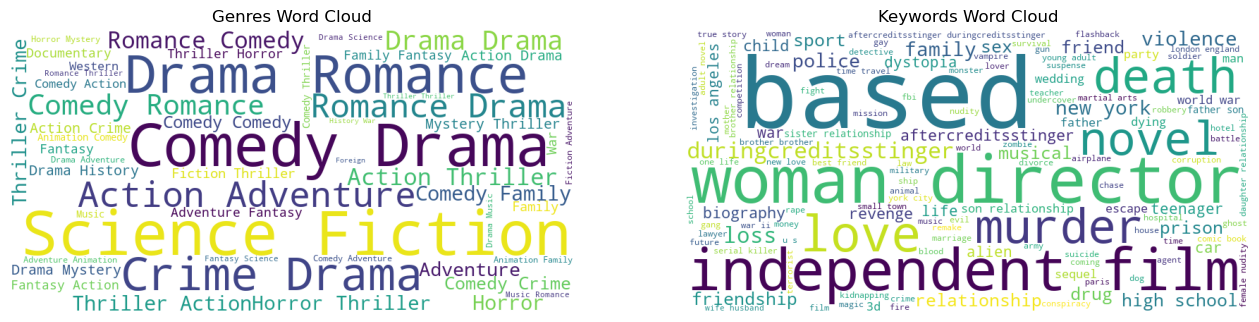

count    4809.000000
mean        6.092514
std         1.193989
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast

# Load the dataset
file_path = 'C:/Users/14435/Downloads/tmdb_5000_movies_with_director (1).csv'
tmdb_movies_df = pd.read_csv(file_path)

# Extracting specific details from the dataset
num_instances = tmdb_movies_df.shape[0]
num_attributes = tmdb_movies_df.shape[1]
attributes_list = tmdb_movies_df.columns.tolist()

# Extracting genres and creating a word cloud
def extract_name_list(column):
    try:
        if isinstance(column, str):
            items_list = ast.literal_eval(column)
            if isinstance(items_list, list):
                names_list = [item['name'] for item in items_list if isinstance(item, dict) and 'name' in item]
                return names_list
    except (ValueError, SyntaxError):
        pass
    return []

genres_list = tmdb_movies_df['genres'].apply(extract_name_list).explode().dropna().tolist()
genres_wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 10).generate(' '.join(genres_list))

# Extracting keywords and creating a word cloud
keywords_list = tmdb_movies_df['keywords'].apply(extract_name_list).explode().dropna().tolist()
keywords_wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 10).generate(' '.join(keywords_list))

# Plotting the word clouds
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(genres_wordcloud)
ax[0].axis('off')
ax[0].set_title('Genres Word Cloud')

ax[1].imshow(keywords_wordcloud)
ax[1].axis('off')
ax[1].set_title('Keywords Word Cloud')

plt.show()

# Getting the distribution of the vote_average
vote_average_dist = tmdb_movies_df['vote_average'].describe()

vote_average_dist


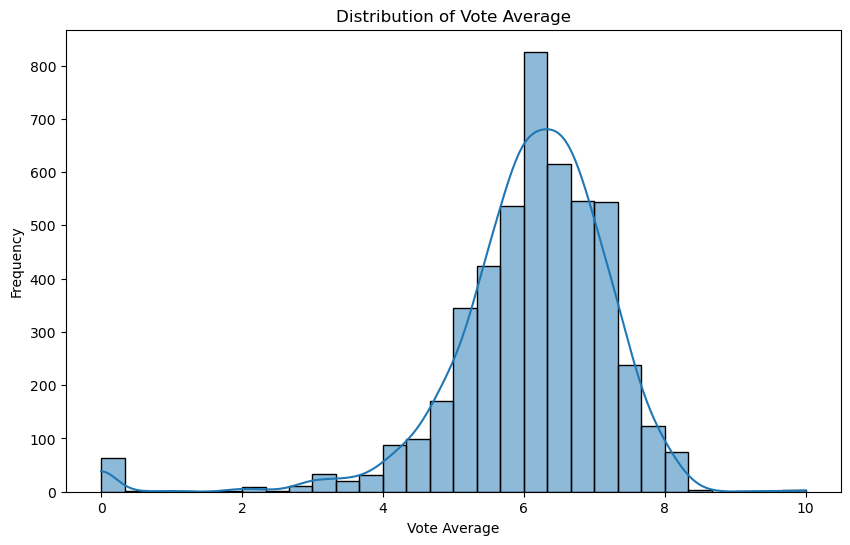

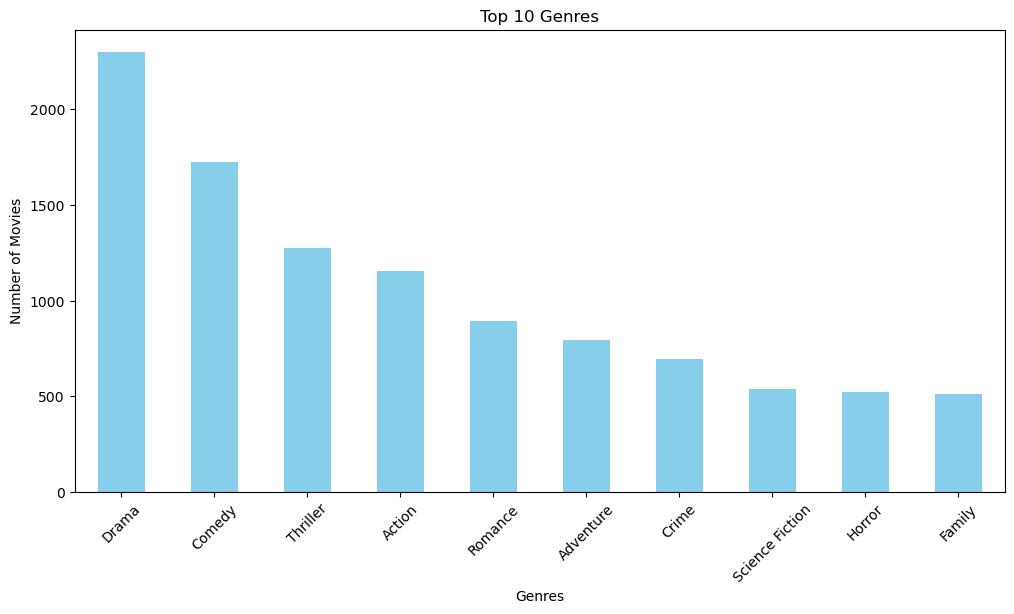

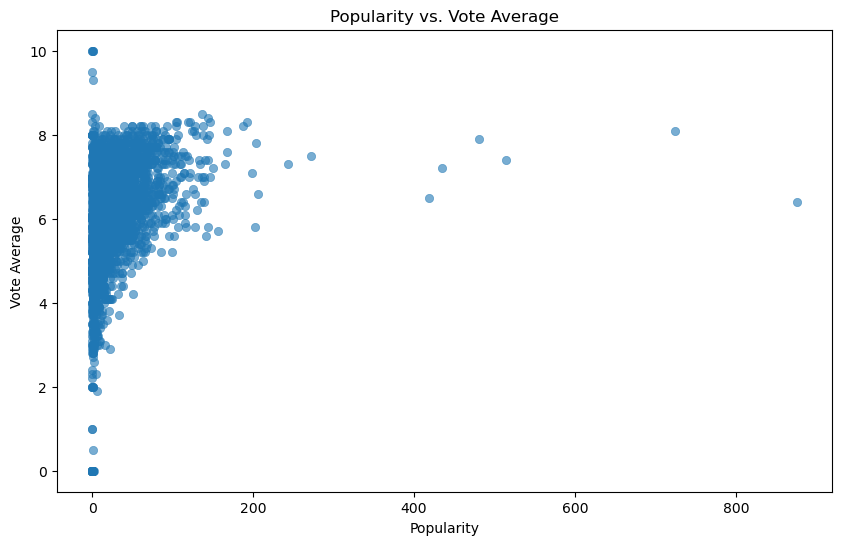

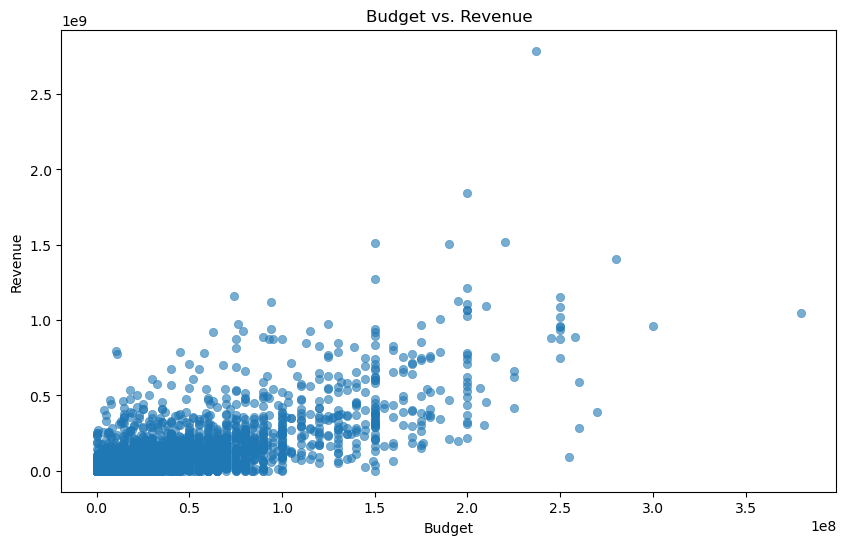

C:\Users\14435\AppData\Local\Temp\ipykernel_51716\766492175.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tmdb_movies_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


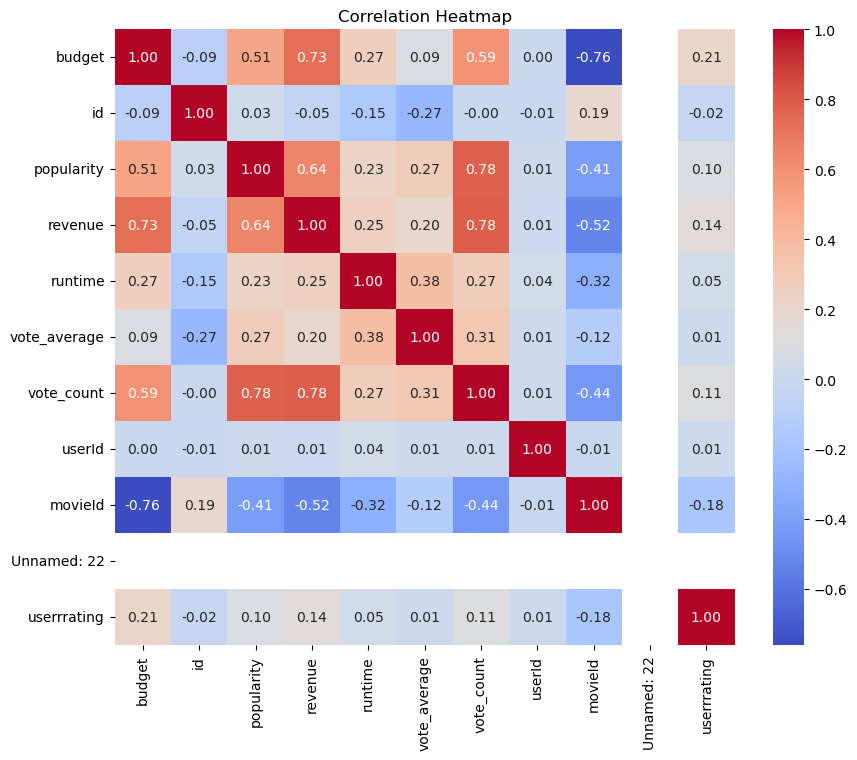

In [5]:
#1. Vote Average Distribution Plot
# Visualizing the distribution of the 'vote_average' attribute using a distribution plot
plt.figure(figsize=(10,6))
sns.histplot(tmdb_movies_df['vote_average'], bins=30, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()
#2. Top 10 Genres Bar Plot
# Counting the occurrences of each genre and plotting the top 10 genres
top_genres = tmdb_movies_df['genres'].apply(extract_name_list).explode().value_counts().head(10)
plt.figure(figsize=(12,6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()
#3. Popularity vs. Vote Average Scatter Plot
# Creating a scatter plot between 'popularity' and 'vote_average' to observe any trends or patterns
plt.figure(figsize=(10,6))
sns.scatterplot(x='popularity', y='vote_average', data=tmdb_movies_df, alpha=0.6, edgecolor=None)
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()
#4. Budget vs. Revenue Scatter Plot
# Creating a scatter plot between 'budget' and 'revenue' to observe any trends or patterns
plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=tmdb_movies_df, alpha=0.6, edgecolor=None)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()
#5. Correlation Heatmap
# Plotting a correlation heatmap of the numerical attributes in the dataset
plt.figure(figsize=(10,8))
sns.heatmap(tmdb_movies_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Basic statistics
num_movies = len(movies_df)
num_directors = movies_df['Director'].nunique()
num_genres = len(set(' '.join(movies_df['genres']).split()))
num_keywords = len(set(' '.join(movies_df['keywords']).split()))
missing_values = movies_df.isnull().sum()

num_movies, num_directors, num_genres, num_keywords, missing_values


(4809,
 2188,
 22,
 7282,
 budget                     0
 genres                     0
 homepage                3096
 id                         0
 keywords                   0
 original_language          0
 original_title             0
 overview                   3
 popularity                 0
 production_companies       0
 production_countries       0
 release_date               1
 revenue                    0
 runtime                    2
 spoken_languages           0
 status                     0
 tagline                  844
 title                      0
 vote_average               0
 vote_count                 0
 userId                     0
 movieId                    0
 Unnamed: 22             4809
 userrrating                0
 Director                   0
 combined_features          0
 dtype: int64)

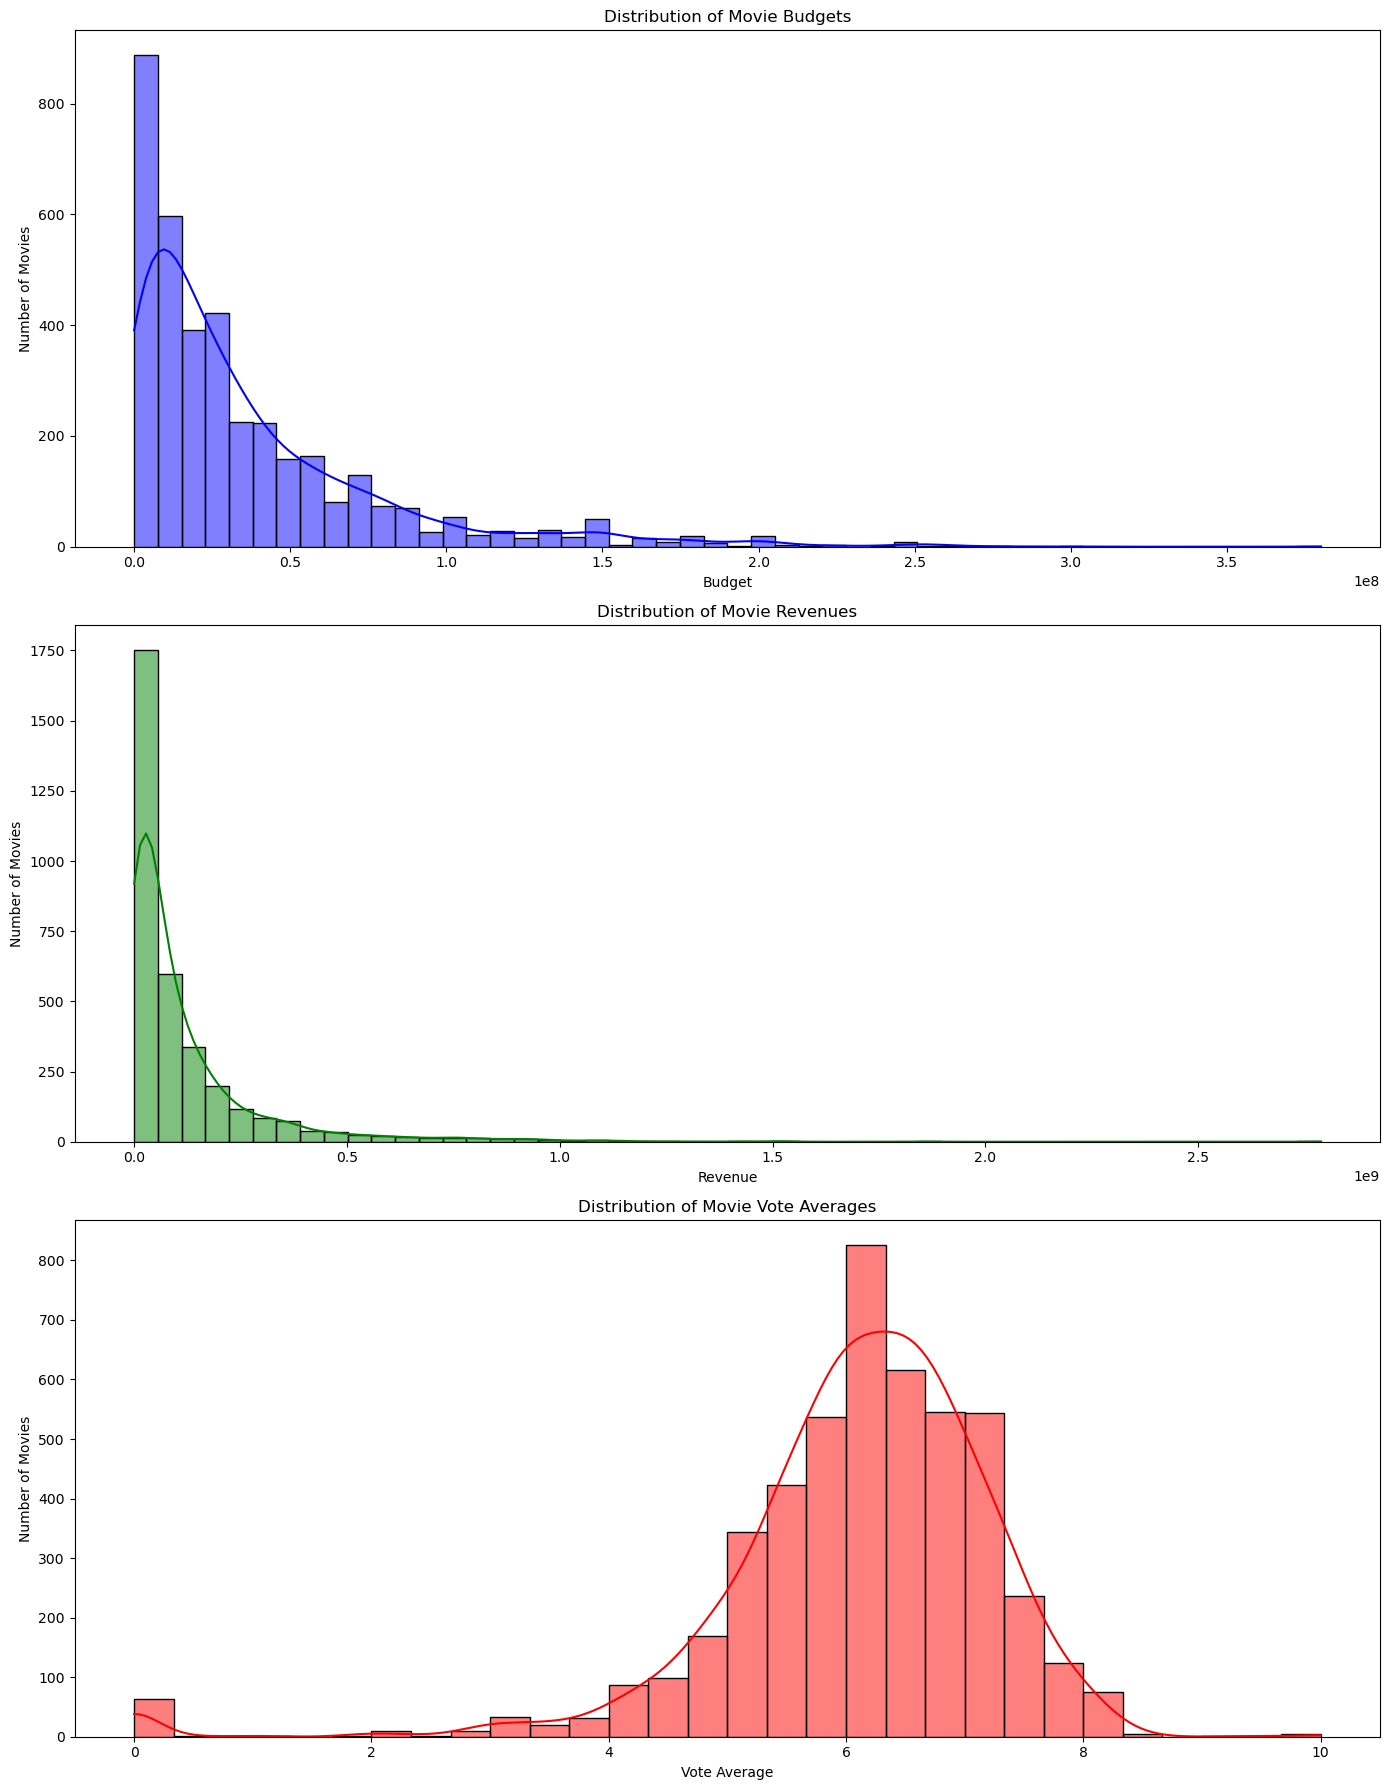

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Distribution of movie budgets
sns.histplot(movies_df[movies_df['budget'] > 0]['budget'], kde=True, ax=axes[0], bins=50, color='blue')
axes[0].set_title('Distribution of Movie Budgets')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Number of Movies')

# Distribution of movie revenues
sns.histplot(movies_df[movies_df['revenue'] > 0]['revenue'], kde=True, ax=axes[1], bins=50, color='green')
axes[1].set_title('Distribution of Movie Revenues')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Number of Movies')

# Distribution of movie vote averages
sns.histplot(movies_df['vote_average'], kde=True, ax=axes[2], bins=30, color='red')
axes[2].set_title('Distribution of Movie Vote Averages')
axes[2].set_xlabel('Vote Average')
axes[2].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()


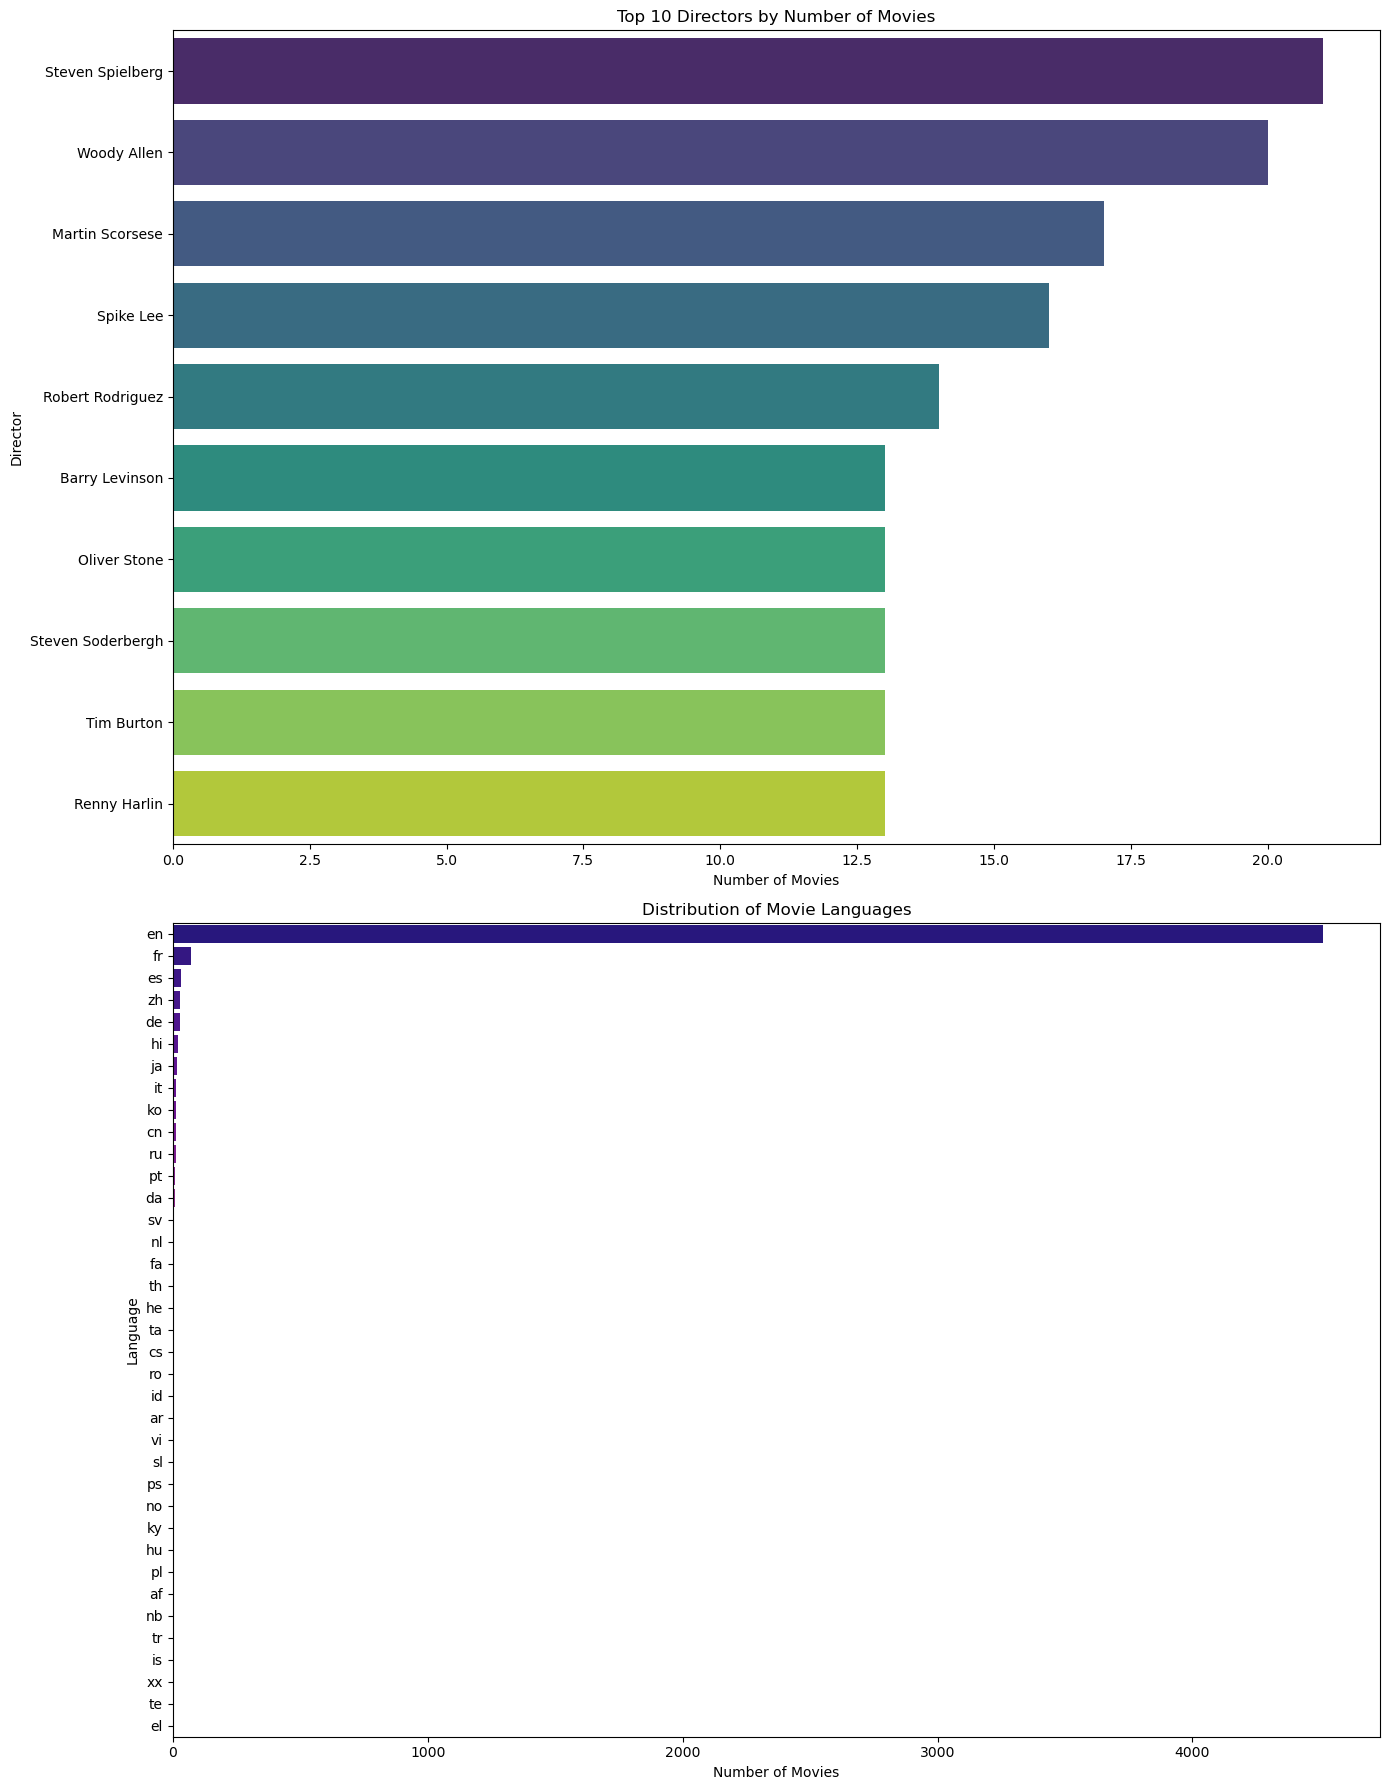

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 18))

# Top directors based on the number of movies they've directed
top_directors = movies_df[movies_df['Director'] != '']['Director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, ax=axes[0], palette="viridis")
axes[0].set_title('Top 10 Directors by Number of Movies')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Director')

# Distribution of movie languages
languages = movies_df['original_language'].value_counts()
sns.barplot(y=languages.index, x=languages.values, ax=axes[1], palette="plasma")
axes[1].set_title('Distribution of Movie Languages')
axes[1].set_xlabel('Number of Movies')
axes[1].set_ylabel('Language')

plt.tight_layout()
plt.show()
